# KC Housing Data Evaluation

In [218]:
#Import the relevant packages into notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=Warning)

Upload the data into the notebook and examine it

In [219]:
kc_house_data=pd.read_csv('data/kc_house_data.csv')

In [220]:
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [221]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [222]:
# Check for Null Values
kc_house_data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There appears to be three columns that have missing data. waterfront, yr_renovated and view. View is only missing 63 while the other two are missing north of 2000. We will probably look deeper but to not mess with the data too much it may make sense to drop those 63 missing view columns.

Get a first look at some of the correlations between the different factors. Specifcally examine how they relate to price.

<AxesSubplot:>

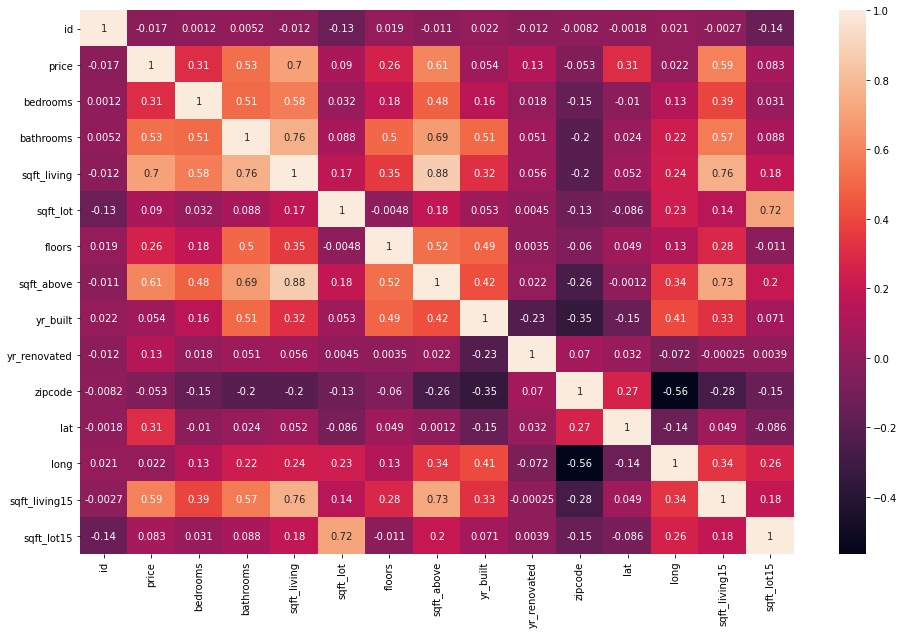

In [223]:
plt.figure(figsize=(16, 10))
sns.heatmap(data=kc_house_data.corr(), annot=True)

Examine the missing data in Waterfront and decide what to do with it

In [224]:
kc_house_data['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [225]:
# Converting all NANs in waterfront to NO because that is overwhelmingly the most common value.
kc_house_data['waterfront']=kc_house_data['waterfront'].fillna('NO')

In [226]:
kc_house_data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [227]:
kc_house_data['waterfront'].isna().sum()

0

We decided that it was best to turn the NaN of the waterfront data into NO. This is because the ratio was 19075 NO to 146 YES. Now lets do the same to View and yr_renovated columns based on what they are missing

In [228]:
kc_house_data['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [229]:
# Converting all NANs in view to NONE because that is overwhelmingly the most common value.
kc_house_data['view']=kc_house_data['view'].fillna('NONE')
kc_house_data['view'].isna().sum()

0

In [230]:
kc_house_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [231]:
# Converting all NANs in yr_renovated to 0 because that is overwhelmingly the most common value.
kc_house_data['yr_renovated'].fillna(0.0, inplace=True)
kc_house_data['yr_renovated'].isna().sum()

0

Now I will deal with the data types that are not in numeric form. We must change them into some type of numeric form before we can deal with them

In [232]:
# There are six columns that are in object form
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Waterfront

In [233]:
kc_house_data['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [234]:
X1=kc_house_data['waterfront']

In [235]:
#Label encode NO and YES into 0 and 1 for the Waterfront column
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
origin_encoded = lb_make.fit_transform(X1)
origin_encoded
origin_encoded=pd.Series(origin_encoded)
origin_encoded.value_counts()

0    21451
1      146
dtype: int64

In [236]:
#Replace the old categorial series with our numeric one
kc_house_data['waterfront']=origin_encoded

In [237]:
#Check to make sure this worked properly
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [238]:
X= kc_house_data.drop(['price'],axis=1)
y=kc_house_data['price']

In [239]:
# I am thinking working through the data in this manner may be better. If using it this early in notebook does not 
# work I will move it down to after I finish cleaning the entire data set
#I've commented it out as it seems best to do this later
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [240]:
#X_train.info()

In [241]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### View

In [242]:
from sklearn.preprocessing import OneHotEncoder
view = OneHotEncoder(sparse=False, handle_unknown='ignore')
X2 = kc_house_data[['view']]
view.fit(X2)
view.transform(X2)
view_array = view.transform(X2)
view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'),
                          index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, view_panda], axis=1)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,View_Average,View_Excellent,View_Fair,View_Good,View_None
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,NONE,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0


In [243]:
kc_house_data.drop('view', axis=1, inplace=True)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,View_Average,View_Excellent,View_Fair,View_Good,View_None
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,Average,...,98178,47.5112,-122.257,1340,5650,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,Average,...,98125,47.7210,-122.319,1690,7639,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,Average,...,98028,47.7379,-122.233,2720,8062,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,...,98136,47.5208,-122.393,1360,5000,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,Average,...,98074,47.6168,-122.045,1800,7503,0.0,0.0,0.0,0.0,1.0


### Condition

In [244]:
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = kc_house_data[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns= ('AvgCond','ExcellentCond','FairCond','GoodCond','PoorCond'), 
                               index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, condition_panda], axis=1)
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,View_Average,View_Excellent,View_Fair,View_Good,View_None,AvgCond,ExcellentCond,FairCond,GoodCond,PoorCond
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,Very Good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [245]:
kc_house_data.drop('condition', axis=1, inplace=True)
kc_house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,View_Average,View_Excellent,View_Fair,View_Good,View_None,AvgCond,ExcellentCond,FairCond,GoodCond,PoorCond
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,6 Low Average,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,8 Good,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


### Sqft Basement 

In [246]:
kc_house_data["sqft_basement"].replace({"?": '0.0'}, inplace=True)
kc_house_data['sqft_basement'] = kc_house_data['sqft_basement'].astype(float)

In [247]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   date            21597 non-null  object 
 2   price           21597 non-null  float64
 3   bedrooms        21597 non-null  int64  
 4   bathrooms       21597 non-null  float64
 5   sqft_living     21597 non-null  int64  
 6   sqft_lot        21597 non-null  int64  
 7   floors          21597 non-null  float64
 8   waterfront      21597 non-null  int64  
 9   grade           21597 non-null  object 
 10  sqft_above      21597 non-null  int64  
 11  sqft_basement   21597 non-null  float64
 12  yr_built        21597 non-null  int64  
 13  yr_renovated    21597 non-null  float64
 14  zipcode         21597 non-null  int64  
 15  lat             21597 non-null  float64
 16  long            21597 non-null  float64
 17  sqft_living15   21597 non-null 

In [248]:
kc_house_data['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

### Grade

In [249]:
kc_house_data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [250]:
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
X4 = kc_house_data[['grade']]
grade.fit(X4)
grade.transform(X4)
grade_array = grade.transform(X4)
grade_panda = pd.DataFrame(grade_array, columns= ('AvgGrade','GoodGrade','BetterGrade','LowAvgGrade','VeryGoodGrade',
                                                 'ExcellentGrade','FairGrade','LuxurGrade','LowGrade',
                                                  'MansionGrade','PoorGrade'), 
                               index=kc_house_data.index)
kc_house_data = pd.concat([kc_house_data, grade_panda], axis=1)
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,GoodGrade,BetterGrade,LowAvgGrade,VeryGoodGrade,ExcellentGrade,FairGrade,LuxurGrade,LowGrade,MansionGrade,PoorGrade
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,6 Low Average,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,7 Average,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,8 Good,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [251]:
kc_house_data.drop(columns=('grade'), inplace=True)

### Date

In [252]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])
kc_house_data['day_sold'] = kc_house_data['date'].map(lambda x: x.day)
kc_house_data['month_sold'] = kc_house_data['date'].map(lambda x: x.month)
kc_house_data['year_sold'] = kc_house_data['date'].map(lambda x: x.year)
kc_house_data.drop('date', axis=1, inplace=True)

In [253]:
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   sqft_above      21597 non-null  int64  
 9   sqft_basement   21597 non-null  float64
 10  yr_built        21597 non-null  int64  
 11  yr_renovated    21597 non-null  float64
 12  zipcode         21597 non-null  int64  
 13  lat             21597 non-null  float64
 14  long            21597 non-null  float64
 15  sqft_living15   21597 non-null  int64  
 16  sqft_lot15      21597 non-null  int64  
 17  View_Average    21597 non-null 

## Working with newly cleaned data

In [254]:
# This seems like the better time to do this now that there are no objects left in the data set
from sklearn.model_selection import train_test_split
X_new= kc_house_data.drop(['price'],axis=1)
y_new=kc_house_data['price']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=100)

In [255]:
# Create Dummy Regressor
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train,y_train)
dummy_regr.predict(X_train)
dummy_regr.score(X_train, y_train)

0.0

In [256]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train)
selector.support_ 

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [257]:
selector.support_ 

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False])

In [258]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
cross_val_score(model, X_train, y_train, cv=3)

array([0.73365398, 0.71819072, 0.71992986])

In [259]:
X_train.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,VeryGoodGrade,ExcellentGrade,FairGrade,LuxurGrade,LowGrade,MansionGrade,PoorGrade,day_sold,month_sold,year_sold
id,1.000000,0.001392,0.003171,-0.010697,-0.130972,0.026625,-0.006095,-0.008229,-0.007013,0.025029,...,-0.005950,-0.001169,-0.028132,-0.013132,-0.018813,0.044579,0.007386,-0.002257,-0.008802,0.008262
bedrooms,0.001392,1.000000,0.509966,0.571611,0.041768,0.174694,-0.009579,0.471756,0.295603,0.152554,...,-0.020080,-0.070759,-0.106809,-0.232743,-0.106995,0.067507,0.161419,-0.012232,0.003773,-0.013338
bathrooms,0.003171,0.509966,1.000000,0.754862,0.092054,0.501498,0.056757,0.685377,0.278308,0.509144,...,-0.013970,-0.057950,-0.139281,-0.361788,-0.318158,0.189152,0.265665,-0.008065,0.007403,-0.024851
sqft_living,-0.010697,0.571611,0.754862,1.000000,0.175679,0.349225,0.097980,0.874879,0.430163,0.320791,...,-0.013416,-0.057001,-0.124387,-0.310274,-0.362749,0.068887,0.319427,-0.011902,0.010998,-0.028839
sqft_lot,-0.130972,0.041768,0.092054,0.175679,1.000000,-0.011335,0.023104,0.184937,0.018280,0.049333,...,-0.000420,0.000451,0.022915,-0.016425,-0.067733,-0.022685,0.043823,-0.001736,-0.001677,0.005769
floors,0.026625,0.174694,0.501498,0.349225,-0.011335,1.000000,0.016779,0.520579,-0.243201,0.495012,...,-0.007202,-0.030699,-0.079204,-0.230616,-0.311691,0.206585,0.242334,-0.007617,0.013139,-0.022651
waterfront,-0.006095,-0.009579,0.056757,0.097980,0.023104,0.016779,1.000000,0.064675,0.081447,-0.021540,...,-0.000650,-0.003050,0.020444,-0.005735,-0.046596,-0.011817,0.005842,0.011719,0.011761,-0.009991
sqft_above,-0.008229,0.471756,0.685377,0.874879,0.184937,0.520579,0.064675,1.000000,-0.053381,0.428343,...,-0.012102,-0.050587,-0.105895,-0.280190,-0.390688,0.060609,0.341678,-0.005664,0.011408,-0.026744
sqft_basement,-0.007013,0.295603,0.278308,0.430163,0.018280,-0.243201,0.081447,-0.053381,1.000000,-0.131537,...,-0.005095,-0.023153,-0.058623,-0.117263,-0.021503,0.030224,0.021234,-0.014113,0.002513,-0.009495
yr_built,0.025029,0.152554,0.509144,0.320791,0.049333,0.495012,-0.021540,0.428343,-0.131537,1.000000,...,-0.013696,-0.044276,-0.130624,-0.308188,-0.219266,0.201124,0.219234,-0.003529,-0.011228,0.005441


In [260]:
abs(X_train.corr()) > 0.75

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,VeryGoodGrade,ExcellentGrade,FairGrade,LuxurGrade,LowGrade,MansionGrade,PoorGrade,day_sold,month_sold,year_sold
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [261]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=X_train.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)

In [262]:
# Look at possible issues of multi-collinarity 
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.874879
"(FairCond, AvgCond)",0.809030
"(year_sold, month_sold)",0.779868
"(sqft_living15, sqft_living)",0.757674
"(sqft_living, bathrooms)",0.754862


In [263]:
#Drop certain columns from the data to avoid problems
X_train.drop(columns=['sqft_above','FairCond','month_sold','sqft_living'], inplace=True)


In [264]:
X_train.head()

,id,bedrooms,bathrooms,sqft_lot,floors,waterfront,sqft_basement,yr_built,yr_renovated,zipcode,...,LowAvgGrade,VeryGoodGrade,ExcellentGrade,FairGrade,LuxurGrade,LowGrade,MansionGrade,PoorGrade,day_sold,year_sold
7152,7201600190,4,1.75,7650,1.0,0,470.0,1975,0.0,98052,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20,2015
8823,2558600100,4,2.00,12620,1.0,0,0.0,1972,0.0,98034,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27,2014
11039,8849300320,3,1.75,12618,1.0,0,0.0,1983,0.0,98188,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16,2015
17557,3751606514,2,1.00,81021,1.0,0,0.0,1954,0.0,98001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26,2014
16607,2607720440,3,2.50,9725,2.0,0,0.0,1994,0.0,98045,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4,2015


In [270]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 7152 to 5640
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              16197 non-null  int64  
 1   bedrooms        16197 non-null  int64  
 2   bathrooms       16197 non-null  float64
 3   sqft_lot        16197 non-null  int64  
 4   floors          16197 non-null  float64
 5   waterfront      16197 non-null  int64  
 6   sqft_basement   16197 non-null  float64
 7   yr_built        16197 non-null  int64  
 8   yr_renovated    16197 non-null  float64
 9   zipcode         16197 non-null  int64  
 10  lat             16197 non-null  float64
 11  long            16197 non-null  float64
 12  sqft_living15   16197 non-null  int64  
 13  sqft_lot15      16197 non-null  int64  
 14  View_Average    16197 non-null  float64
 15  View_Excellent  16197 non-null  float64
 16  View_Fair       16197 non-null  float64
 17  View_Good       16197 non-nul

In [269]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(X_train, y_train)
selector.support_ 

array([False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [274]:
x_cols=['waterfront','lat','GoodGrade','BetterGrade','LowAvgGrade']
outcome='price'
predictors='+'.join(x_cols)

In [277]:
from statsmodels.formula.api import ols
formula= outcome + '~' + predictors
new_model = ols(formula=formula, data=kc_house_data).fit()
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     2765.
Date:                Mon, 15 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:08:18   Log-Likelihood:            -3.0205e+05
No. Observations:               21597   AIC:                         6.041e+05
Df Residuals:                   21591   BIC:                         6.042e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.592e+07   6.71e+05    -53.547      0.000   -3.72e+07   -3.46e+07
waterfront   9.994e+05    2.4e+04     41.701      0.000    9.52e+05    1.05e+06
lat           7.66e+05   1.41e+04     54.305      0.000    7.38e+05    7.94e+05
GoodGrade    9.113e+05   1.45e+04     62.660      0.000    8.83e+05     9.4e+05
BetterGrade  1.554e+06   3.06e+04     50.804      0.000    1.49e+06    1.61e+06
LowAvgGrade  3.146e+06   7.96e+04     39.518      0.000    2.99e+06     3.3e+06
==============================================================================
Omnibus:                    12957.015   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240646.612
Skew:                           2.540   Prob(JB):                         0.00
Kurtosis:                      18.544   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Initial reaction to this model is that the P values as low, the R squared is much too low and there is still much work to be done with it.

We are also getting some crazy high coefficients and that is something else that must be fixed

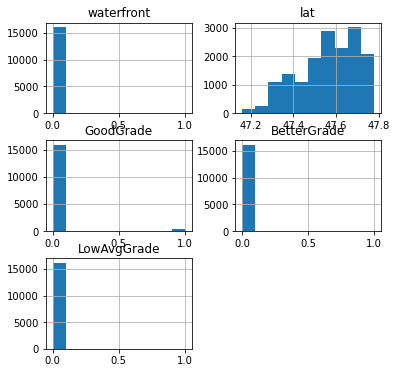

In [280]:
# Check to see how the predictors are distributed
X_train[x_cols].hist(figsize  = [6, 6]); 